## Storing the csv files into a list

In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import glob

# enter your path here
pathToFolder = r"D:\Users\Ervie John\Documents\4th year 1st sem\Digital Signal Processing and Application\Module 1\CPE-027-CPE41S2_Lab1-Group3"

os.chdir(pathToFolder+"\dataset for kids") # changing directory to this folder

fileExtension = 'B1.csv'
allCSVFiles = [i for i in glob.glob(f"*{fileExtension}")] # finding csv files with the B1.csv and then store it in a list

allCSVFiles.remove('G1_Hd1_FTDS_SP1_050418_162003_1_0_BaseNoise_B1.csv') # this file is not included

sorted_allCSVFiles = sorted(allCSVFiles, key=len) # the list are not sorted properly, then I sorted it according to their length of character

196


## Creating a folder and csv file

In [2]:
from os import path # include this library for checking of file and folder if exist

os.chdir(pathToFolder) # changing directory
if (str(path.exists('Compiled_Csv_Files')) != "True"): # checking if Compiled_Csv_Files is exist 
    os.mkdir("Compiled_Csv_Files") # if not create this folder named Compiled_Csv_Files

## Importing the mean, standard deviation, and standard error

In [3]:
import csv 

os.chdir(pathToFolder+"\Compiled_Csv_Files") # Changing directory to Compiled_Csv_Files
counter = 0

if (str(path.exists('AllCsvFiles.csv')) != "True"): # checking if AllCsvFiles.csv is exist
    header = ['Steps','Mean', 'Standard Deviation'] # if not create a csv file named AllCsvFiles.csv

    with open('AllCsvFiles.csv', 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)

        # write the header
        writer.writerow(header)

    for CSVFiles in sorted_allCSVFiles: # storing the mean and standard devation per steps in AllCsvFiles.csv file
        os.chdir(pathToFolder+"\dataset for kids")
        df = pd.read_csv(CSVFiles, skiprows=5) # Skip the first 5 row to begin at the row time series and AE [V]
        data = [counter, (df.mean()['AE [V]']), (df.std()['AE [V]'])] # storing the mean and std value in a list

        os.chdir(pathToFolder+"\Compiled_Csv_Files")
        with open('AllCsvFiles.csv', 'a', encoding='UTF8', newline='') as f: # I used newline='' to avoid extra space of row
            writer = csv.writer(f)

            # write the data
            writer.writerow(data) # writing the data value to AllCsvFiles.csv file

        counter+=1

## Saving the histogram and time series into PNG file

KeyboardInterrupt: 

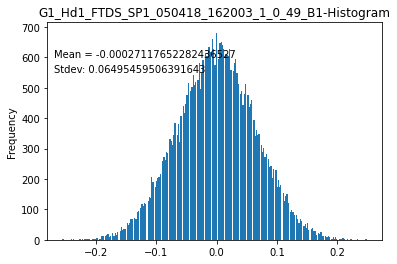

In [30]:
from os import path # include this library for checking of file and folder if exist

os.chdir(pathToFolder+"\Compiled_Csv_Files") # changing directory
if (str(path.exists('Histogram')) != "True"): # checking if Histogram is exist 
    os.mkdir("Histogram") # if not create this folder named Histogram

for CSVFiles in sorted_allCSVFiles:
    os.chdir(pathToFolder+"\dataset for kids") # Changing directory to dataset for kids folder
    df = pd.read_csv(CSVFiles, skiprows=5) # Skip the first 5 row to begin at the row time series and AE [V]
    Hist_title = CSVFiles[:-4] + "-Histogram" # exclude the .csv extension
    df['AE [V]'].plot(kind='hist', title=Hist_title, bins = 250, xlabel='AE [V]', ylabel='Count')
    plt.text(-0.27,600,"Mean = "+str(df.mean()['AE [V]']))
    plt.text(-0.27,550,"Stdev: "+str(df.std()['AE [V]']))

    os.chdir(pathToFolder+"\Compiled_Csv_Files\Histogram") # Changing directory to Compiled_Csv_Files folder
    plt.savefig(Hist_title+'.png', facecolor='white', transparent=False) # saving the plot into png file
    plt.clf() # to clear the current plot to make new

In [5]:
from os import path # include this library for checking of file and folder if exist

os.chdir(pathToFolder+"\Compiled_Csv_Files") # changing directory
if (str(path.exists('Time-Series Data')) != "True"): # checking if Time-Series Data is exist 
    os.mkdir("Time-Series Data") # if not create this folder named Time-Series Data

for CSVFiles in sorted_allCSVFiles:
    os.chdir(pathToFolder+"\dataset for kids")
    df = pd.read_csv(CSVFiles, skiprows=5) # Skip the first 5 row to begin at the row time series and AE [V]
    TS_title = CSVFiles[:-4] + "-Time-Series" # exclude the .csv extension
    df['AE [V]'].plot(title=TS_title, xlabel='Steps', ylabel='Count')

    os.chdir(pathToFolder+"\Compiled_Csv_Files\Time-Series Data") # Changing directory to Compiled_Csv_Files folder
    plt.savefig(TS_title+'.png', facecolor='white', transparent=False) # saving the plot into png file
    plt.clf() # to clear the current plot to make new

<Figure size 432x288 with 0 Axes>

### Plot all the mean

In [6]:
os.chdir(pathToFolder+"\Compiled_Csv_Files") # Changing directory to Compiled_Csv_Files folder
df = pd.read_csv('AllCsvFiles.csv') # reading the AllCsvFiles.csv file

meanTitle = "Mean of all steps" # title of plot

df['Mean'].plot(title=meanTitle, xlabel='Steps', ylabel='Mean') # ploting the mean of all steps
plt.savefig('AllCsvFiles-Mean'+'.png', facecolor='white', transparent=False) # saving the plot into png file
plt.clf() # to clear the current plot to make new

<Figure size 432x288 with 0 Axes>